# <span style = "color:brown"> Project - Handwritten Digits Classification </span>

***

Keras is a powerful and easy-to-use free open source Python library for developing and evaluating Deep Learning models.

It wraps the efficient numerical computation libaries Theano and TensorFlow and allows you to define and train neural network models in just a few lines of code.

In this project, you will discover how to create your first deep learning neural network model in Python using TensorFlow and Keras.

## Overview

The steps covered in this project are as follows:

1. Load Data
2. Data Preprocessing
3. Define Keras Model
4. Compile Model
5. Train the model
6. Evaluate the model
7. Make Predictions

## About the dataset

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

Your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images using neural networks

## Let us Begin

### Import necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import glob
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import confusion_matrix

### Read 'mnist.csv' dataset and store it in a DataFrame variable

In [6]:
df = pd.read_csv('mnist.csv')

### View the data

In [8]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### View the column names

In [14]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

### Check the shape of the data

In [19]:
df.shape

(42000, 785)

<b><i> Means that we have 42000 rows(images) and 785 columns </i></b>

### Split the data set into X and y variables (Input and target)

In [24]:
# Note that 'label' column in the dataset is our target

In [26]:
X = df.drop('label', axis=1)
y = df['label']

### Check the shape of X and y

In [29]:
X.shape

(42000, 784)

In [31]:
y.shape

(42000,)

### Reshape X to (len(X),28,28,1)

In [34]:
X = X.values.reshape((len(X),28,28,1))

### Check the shape of X

In [37]:
X.shape

(42000, 28, 28, 1)

The shape of X is (42000, 28,28,1)
   * 42000 means that we have 42000 images
   * 28 means that our image size is 28x28 pixels

### Normalise the data by dividing it by 255

In [42]:
X = X/255

The pixel values can range from 0 to 256. Each number represents a color code.

When using the image as it is and passing through a Deep Neural Network, the computation of high numeric values may become more complex.

To reduce this we can normalize the values to range from 0 to 1.

In this way, the numbers will be small and the computation becomes easier and faster.

As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1.

### Plot the first few digits

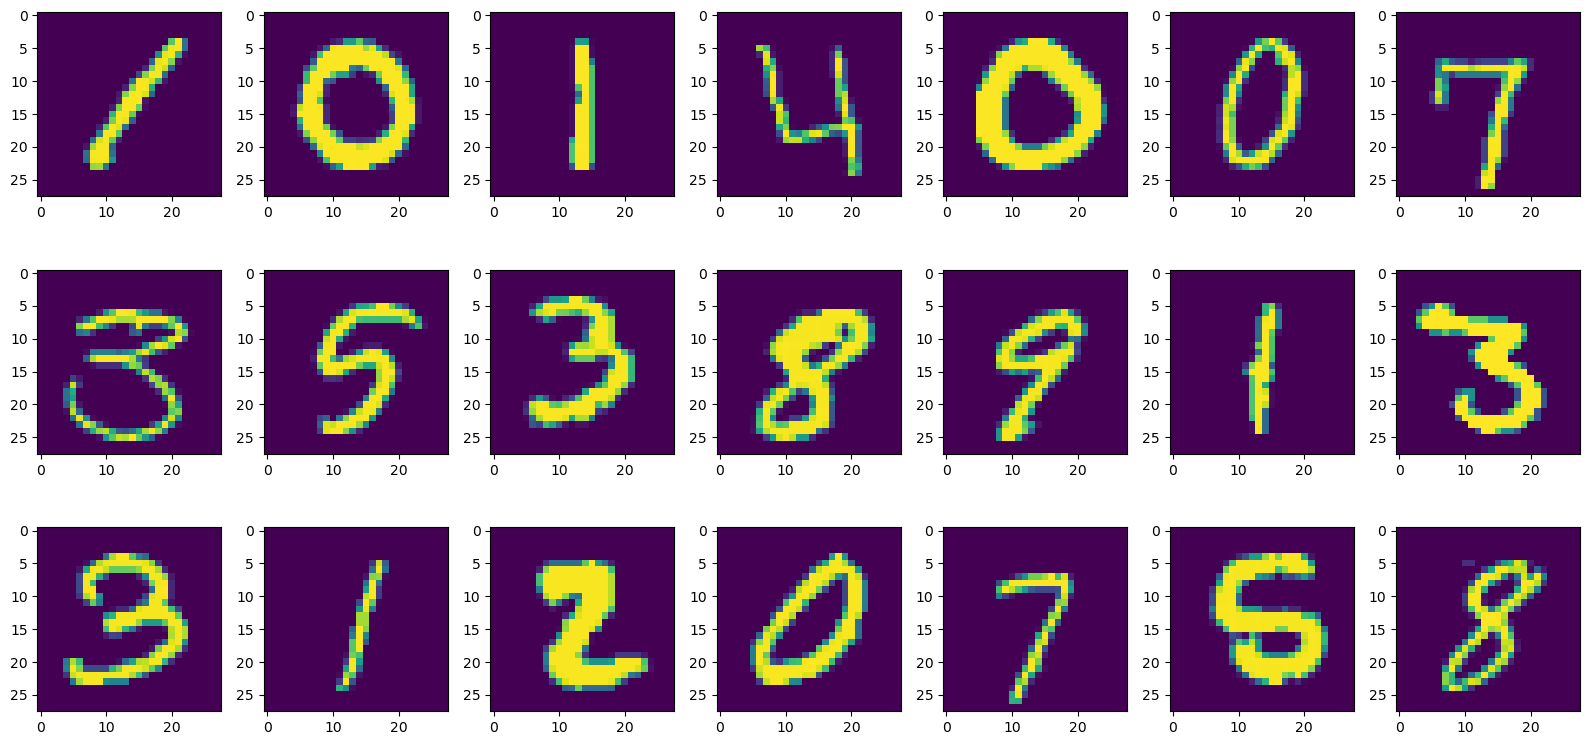

In [46]:
plt.figure(figsize = (16,8))
for i in range(21):
    plt.subplot(3,7,i+1)
    plt.imshow(X[i])
plt.tight_layout()

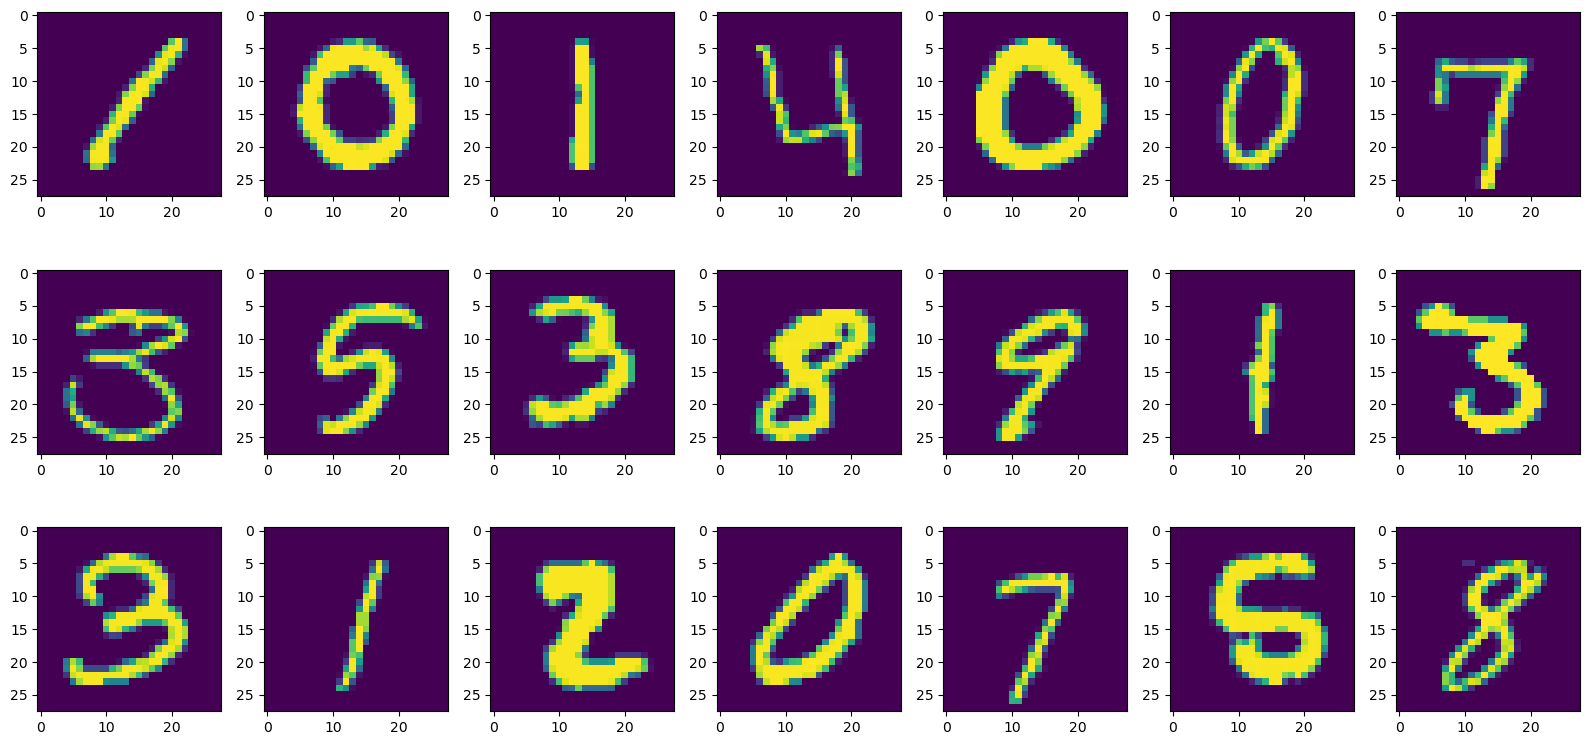

In [47]:
plt.figure(figsize = (16,8))
for i in range(21):
    plt.subplot(3,7,i+1)
    plt.imshow(X[i])
plt.tight_layout()

### Split the dataset into Training and Testing set

In [51]:
from sklearn.model_selection import train_test_split


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

### Check the shape of X_train and X_test

In [57]:
X_train.shape

(33600, 28, 28, 1)

In [59]:
X_test.shape

(8400, 28, 28, 1)

## Create a Keras Sequential model

In [62]:
from tensorflow.keras.models import Sequential

In [64]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Input

In [81]:
 model=Sequential([
    Input(shape=(28,28,1)),

    Conv2D(16,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
    
])

In [83]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,714 (221.54 KB)

 Trainable params: 56,714 (221.54 KB)

 Non-trainable params: 0 (0.00 B)

### Compile Keras Model

In [86]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

### Check the summary of our model

In [90]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,714 (221.54 KB)

 Trainable params: 56,714 (221.54 KB)

 Non-trainable params: 0 (0.00 B)

### Fit Keras Model

In [94]:
model.fit(X_train,y_train,epochs=50,batch_size=8,validation_split=0.1)

Epoch 1/50
3780/3780 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8893 - loss: 0.3681 - val_accuracy: 0.9759 - val_loss: 0.0720
Epoch 2/50
3780/3780 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9790 - loss: 0.0651 - val_accuracy: 0.9801 - val_loss: 0.0682
Epoch 3/50
3780/3780 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9865 - loss: 0.0440 - val_accuracy: 0.9818 - val_loss: 0.0535
Epoch 4/50
3780/3780 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9914 - loss: 0.0290 - val_accuracy: 0.9812 - val_loss: 0.0604
Epoch 5/50
3780/3780 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9936 - loss: 0.0186 - val_accuracy: 0.9854 - val_loss: 0.0499
Epoch 6/50
3780/3780 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9949 - loss: 0.0151 - val_accuracy: 0.9848 - val_loss: 0.0543
Epoch 7/50
3780/3780 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9961 - loss: 0.0112 - val_accuracy: 0.9815 - val_loss: 0.0744
Epoch 8/50
3780/3780 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9963 - loss: 0.0105 - 

### Make predicitons using X_test and store it in a variable

Making predictions is as easy as calling the <b>predict</b> function on the model. We are using a sigmoid activation function on the output layer, so the predicitons will be a probability in the range between 0 and 1 for all classifications.

In [100]:
prediction = model.predict(X_test)

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step


### View prediciton

In [103]:
prediction

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.7377509e-33],
       [1.3492660e-37, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        3.5885414e-27, 1.6729094e-23],
       [3.8018273e-26, 1.0000000e+00, 4.8169983e-23, ..., 3.7828748e-19,
        3.0240012e-26, 7.1978717e-15],
       ...,
       [0.0000000e+00, 1.0146037e-33, 3.3561222e-35, ..., 4.5587349e-28,
        6.4828794e-20, 1.1396802e-17],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.8226623e-32, 5.8325091e-29],
       [0.0000000e+00, 4.1212089e-35, 5.0028573e-28, ..., 4.1462144e-37,
        2.6533120e-12, 4.2726669e-11]], dtype=float32)

##### Each element in the array consist of probalibily of each classification. We can check the maximum of each element with a numpy funciton called argmax()

### Check the first predicted value and plot the corresponding data

In [107]:
np.argmax(prediction[0])

5

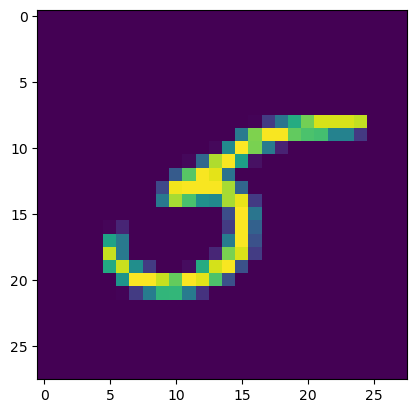

In [109]:
plt.imshow(X_test[0])

### Store all the predicted values as numbers in a list

##### Use list comprehension to achieve this task

In [113]:
predicted_values = [np.argmax(i) for i in prediction]

### Plot the accuracy of our prediction

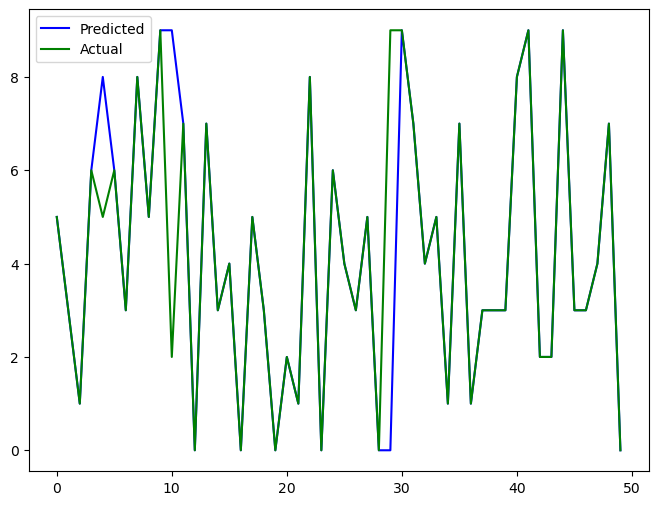

In [116]:
c = range(len(predicted_values))
plt.figure(figsize = (8,6))
plt.plot(c[:50], predicted_values[:50], color = 'blue')
plt.plot(c[:50], y_test[:50], color = 'green')
plt.legend(['Predicted', 'Actual'])
plt.show()

### Plot confusion matrix using heatmap

Text(70.72222222222221, 0.5, 'Actual Values')

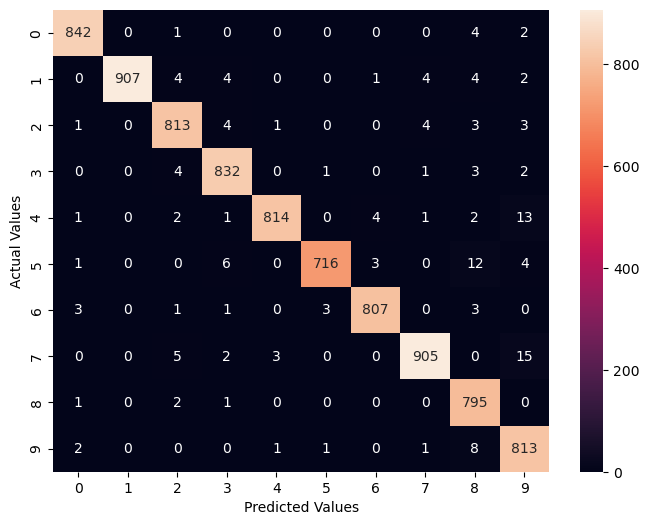

In [119]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test,predicted_values), annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

***